In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [7]:
#       [name, milogP, washout time constant (s), R group name, R group logP]  
data = [["GLPG1837", 1.76, 17.4, "pyrazole", 0.26],
        ["JM96", 5.76, 2166.5, "1-undecanol", 4.72],
        ["JM97", 2.59, 56.5, "phenylethyl alcohol", 1.36],
        ["JM112", 3.74, 243.02, "1-heptanol", 2.62]
       ]

washout_time_constants = [d[2] for d in data]
washout_rates = [1/d[2] for d in data]
labels = [d[0] for d in data]
labels_r = [d[3] for d in data]

time_constants_r_group = [10**(d[4]/2) for d in data]
arrhenius_rates_r_group = [10**(-d[4]/2) for d in data]
arrhenius_rates_milogp = [10**(-d[1]/2) for d in data]

9.371660426704645 21.913567894966803
9.371660426704643 21.913567894966604 0.9997991684774291 0.00020083152257088788 0.13283053047024895


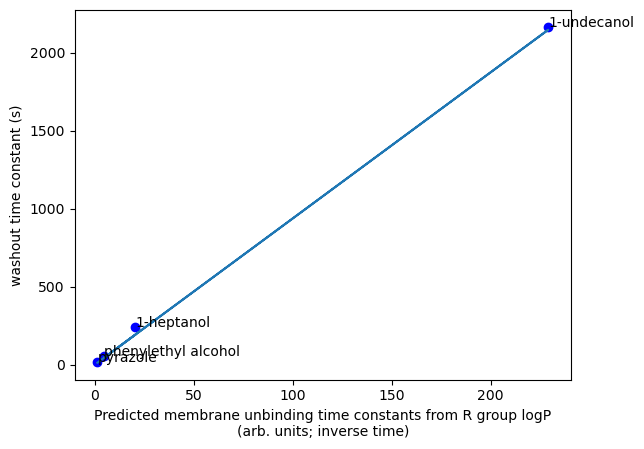

In [16]:

fig, ax = plt.subplots()
plt.scatter(time_constants_r_group, washout_time_constants, color="blue")

for i, txt in enumerate(labels_r):
    ax.annotate(txt, (time_constants_r_group[i]+0.01, washout_time_constants[i]))

plt.xlabel("Predicted membrane unbinding time constants from R group logP\n(arb. units; inverse time)")
plt.ylabel("washout time constant (s)")
#plt.xlim(0,0.8)
#plt.ylim(0,0.06)

#linear fit
m, b = np.polyfit(time_constants_r_group, washout_time_constants, 1)
predicted_values = m*np.array(time_constants_r_group)
plt.plot(time_constants_r_group, predicted_values)
plt.savefig("washout_vs_r_group_logp_time_constants", dpi=600)

print(m,b)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(time_constants_r_group, washout_time_constants)
print(slope, intercept, r_value, p_value, std_err)

0.07706837986654085 0.0006005833226879173
0.07706837986654083 0.0006005833226879163 0.9996683468220934 0.00033165317790662113 0.0014038682694698143


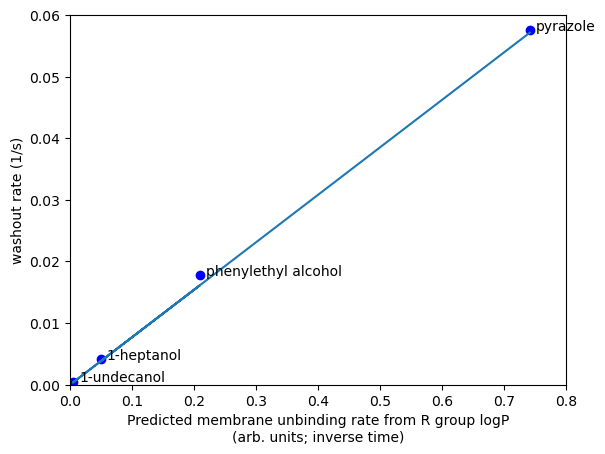

In [15]:

fig, ax = plt.subplots()
plt.scatter(arrhenius_rates_r_group, washout_rates, color="blue")

for i, txt in enumerate(labels_r):
    ax.annotate(txt, (arrhenius_rates_r_group[i]+0.01, washout_rates[i]))

plt.xlabel("Predicted membrane unbinding rate from R group logP\n(arb. units; inverse time)")
plt.ylabel("washout rate (1/s)")
plt.xlim(0,0.8)
plt.ylim(0,0.06)

#linear fit
m, b = np.polyfit(arrhenius_rates_r_group, washout_rates, 1)
predicted_values = m*np.array(arrhenius_rates_r_group)
plt.plot(arrhenius_rates_r_group, predicted_values)
plt.savefig("washout_vs_r_group_logp_rate", dpi=600)

print(m,b)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(arrhenius_rates_r_group, washout_rates)
print(slope, intercept, r_value, p_value, std_err)

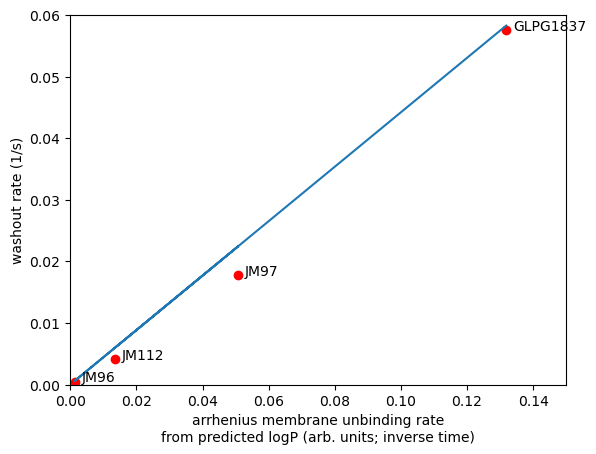

In [4]:
fig, ax = plt.subplots()
plt.scatter(arrhenius_rates_milogp, washout_rates, color="red")

for i, txt in enumerate(labels):
    ax.annotate(txt, (arrhenius_rates_milogp[i]+0.002, washout_rates[i]))

plt.xlabel("arrhenius membrane unbinding rate\nfrom predicted logP (arb. units; inverse time)")
plt.ylabel("washout rate (1/s)")
plt.xlim(0,0.15)
plt.ylim(0,0.06)

#linear fit
m, b = np.polyfit(arrhenius_rates_milogp, washout_rates, 1)
predicted_values = m*np.array(arrhenius_rates_milogp)
plt.plot(arrhenius_rates_milogp, predicted_values)